In [37]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from matplotlib import rc, font_manager
rc('font', family='NanumGothic')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score 

from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

import mglearn
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

import random
import json
import folium

import math

# 최종 데이터

In [3]:
data_total=pd.read_csv('data_total.csv')

In [4]:
data_total.drop('Unnamed: 0', axis =1 ,inplace=True)

In [5]:
data_total.head()

,자치구,동,edu_percent,동별_친환경자동차수,store_총_개소,백화점_개소,합계_사업체수,㎡당 매매평균가,행정구역코드,가구수별_승용차수,동별_수소차_대수,택시
0,종로구,사직동,8319.397863,95.695177,0.0,0.0,3544,756.0,1101053.0,0.144169,0.569495,1.653815e+09
1,종로구,삼청동,2603.942721,29.952259,0.0,0.0,753,716.0,1101054.0,0.150556,0.170688,1.689370e+09
2,종로구,부암동,8928.650976,102.703207,0.0,0.0,567,345.0,1101055.0,0.147209,0.598577,1.597098e+09
3,종로구,평창동,16188.846626,186.214745,0.0,0.0,739,421.0,1101056.0,0.164524,0.971080,1.496236e+09
4,종로구,무악동,6999.208224,80.509489,0.0,0.0,531,809.0,1101057.0,0.164636,0.419559,1.654529e+09


In [6]:
data_total.describe()

,edu_percent,동별_친환경자동차수,store_총_개소,백화점_개소,합계_사업체수,㎡당 매매평균가,행정구역코드,가구수별_승용차수,동별_수소차_대수,택시
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,4.240000e+02,424.000000,424.000000,4.240000e+02
mean,20393.933962,224.523585,1.101415,0.073113,1940.714623,738.923939,1.113659e+06,0.132830,0.344340,3.516850e+09
std,8896.494830,167.210881,1.666411,0.286552,1903.805918,348.332548,7.406174e+03,0.098007,0.414676,2.102383e+09
min,272.802602,2.548947,0.000000,0.000000,102.000000,315.000000,1.101053e+06,0.001876,0.008307,1.053597e+08
25%,14407.742501,127.919507,0.000000,0.000000,962.250000,520.750000,1.107070e+06,0.064347,0.125129,1.654351e+09
50%,19704.855530,177.462681,1.000000,0.000000,1458.000000,626.250000,1.114068e+06,0.095624,0.201705,3.404922e+09
75%,25189.322043,258.842592,1.000000,0.000000,2103.000000,855.000000,1.120318e+06,0.163627,0.363529,5.621767e+09
max,54636.436879,1296.725646,16.000000,2.000000,15851.000000,2538.000000,1.125074e+06,0.603239,3.033190,7.092599e+09


In [7]:
data_total['clus']=pd.cut(data_total.동별_친환경자동차수 ,10,labels=[1,2,3,4,5,6,7,8,9,10])

In [8]:
data_total.clus.unique()

[1, 2, 3, 4, 5, 6, 7, 9, 8, 10]
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [9]:
df = data_total.copy()

In [10]:
x=df[['edu_percent', '동별_친환경자동차수', 
       '합계_사업체수', '㎡당 매매평균가',  '가구수별_승용차수', '동별_수소차_대수','택시']]

In [11]:
x = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled = StandardScaler().fit_transform(x_scaled)
df1 = pd.DataFrame(x_scaled)

In [12]:
df1['sum1']=df1.sum(axis = 1, skipna = True) 

In [13]:
df.iloc[:,2:12].columns

Index(['edu_percent', '동별_친환경자동차수', 'store_총_개소', '백화점_개소', '합계_사업체수',
       '㎡당 매매평균가', '행정구역코드', '가구수별_승용차수', '동별_수소차_대수', '택시'],
      dtype='object')

In [14]:
df1.columns=['edu_percent', '동별_친환경자동차수', '합계_사업체수',
       '㎡당 매매평균가', '가구수별_승용차수', '동별_수소차_대수', '택시', 'sum1']

In [15]:
df=df[['자치구', '동','clus']]

In [16]:
df.head()

,자치구,동,clus
0,종로구,사직동,1
1,종로구,삼청동,1
2,종로구,부암동,1
3,종로구,평창동,2
4,종로구,무악동,1


In [17]:
df_norm=df.merge(df1,left_index=True,right_index=True)

In [18]:
X=df_norm.iloc[:,3:11]

In [19]:
y=df_norm.iloc[:,2]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=9)

In [21]:
x = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
x = x.reshape((x.shape[0], -1))

In [22]:
x = np.divide(x, 255.)

In [23]:
# 10 clusters
n_clusters = len(np.unique(y))
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(x)
# Evaluate the K-Means clustering accuracy.
metrics.accuracy_score(y, y_pred_kmeans)

0.01650943396226415

In [24]:
# 군집 모델을 만듭니다
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print(kmeans.labels_)
print(kmeans.predict(X))

[2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 0 2 0 0 0 0 2 0 2 2 0 2 2 2 0 0 0 0 2 2 0 0 0 2 2 2 2 2 2 2 2 2
 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2
 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0 0 0 2 2 0 0 0 0 2 2 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 0
 0 0 2 0 0 0 2 2 0 2 2 0 2 2 0 0 0 0 2 2 2 0 2 2 2 2 1 0 0 0 0 0 0 2 2 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 0 2 2 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 2 0 2 2 2 0 0 2 0 0 2 0 0 0 0]
[2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 0 2 0 0 0 0 2 0 2 2 0 2 2 2 0 0 0 0 2 2 0 0 0 2 2 2 2

In [25]:
X_train.head()

,edu_percent,동별_친환경자동차수,합계_사업체수,㎡당 매매평균가,가구수별_승용차수,동별_수소차_대수,택시,sum1
236,0.226337,-0.112175,-0.621971,0.333627,0.013694,-0.493184,1.031516,0.377844
302,0.785467,0.841984,1.760284,-0.456781,0.350421,0.141602,1.495407,4.918385
332,0.211369,-0.489509,-0.142890,-0.393548,-0.979922,-0.547315,1.371790,-0.970026
288,-0.579880,-0.127036,0.617012,-0.347561,0.095205,-0.194422,1.486056,0.949375
211,-0.205199,-0.302310,0.054316,0.437099,-0.058330,0.164052,-0.074272,0.015356


Text(0, 0.5, '특성 1')

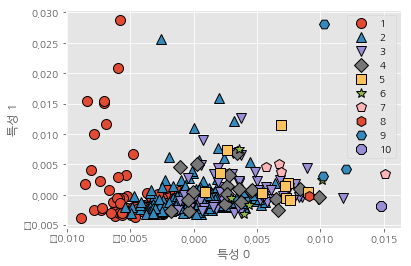

In [26]:
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(x)

mglearn.discrete_scatter(x[:, 0], x[:, 2], y)
plt.legend([1,2,3,4,5,6,7,8,9,10], loc='best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 방법론 합치기

In [27]:
sum_norm = df_norm[['자치구', '동', 'sum1']]

In [28]:
data_total= data_total.merge(sum_norm, how ='inner', on=['자치구','동'])

In [29]:
data_total['sum_clus']=pd.qcut(data_total['sum1'] ,10,labels=[1,2,3,4,5,6,7,8,9,10])

In [30]:
data_ci=pd.read_csv('data_ci.csv')

In [31]:
data_ci=data_ci[['자치구', '동', 'cluster',
       '총_점수_interval_10', '수소충전소']]

In [32]:
data_total= data_total.merge(data_ci, how ='inner', on=['자치구','동'])

In [33]:
data_total[(data_total.수소충전소 ==1)]

,자치구,동,edu_percent,동별_친환경자동차수,store_총_개소,백화점_개소,합계_사업체수,㎡당 매매평균가,행정구역코드,가구수별_승용차수,동별_수소차_대수,택시,clus,sum1,sum_clus,cluster,총_점수_interval_10,수소충전소
192,서대문구,천연동,16111.950204,136.340139,0.0,0.0,941,746.0,1113052.0,0.088278,0.302759,2.478307e+09,2,-2.565358,3,1,5,1
217,마포구,상암동,31893.596888,298.890669,1.0,0.0,2324,777.0,1114074.0,0.153883,0.584931,2.202600e+09,3,2.220485,8,7,9,1
256,강서구,방화2동,19364.226119,315.751824,3.0,0.0,3318,549.0,1116071.0,0.089185,0.182486,6.114514e+09,3,1.009170,8,3,8,1
285,영등포구,여의동,28831.595540,384.595235,2.0,0.0,8082,1209.0,1119054.0,0.172838,0.410445,6.701127e+09,3,8.573373,10,7,10,1
355,서초구,양재2동,28108.296428,422.981365,3.0,0.0,5271,1036.0,1122067.0,0.314933,1.771057,3.949320e+09,4,10.172441,10,4,10,1
377,강남구,대치2동,47547.097106,1146.009288,2.0,0.0,3965,1672.0,1123079.0,0.435855,1.666364,4.971156e+09,9,19.299480,10,5,10,1
415,강동구,천호3동,24584.936099,229.710743,2.0,0.0,1859,601.0,1125063.0,0.090212,0.197738,4.553218e+09,2,-0.232478,6,3,8,1


In [34]:
data_total['pca_clus']=pd.cut(data_total.pca ,10,labels=[1,2,3,4,5,6,7,8,9,10])

AttributeError: 'DataFrame' object has no attribute 'pca'

In [ ]:
data_total.clus=data_total.clus.astype('int')
data_total.sum_clus=data_total.sum_clus.astype('int')
data_total.pca_clus=data_total.pca_clus.astype('int')

In [35]:
data_total.groupby('수소충전소').agg({'cluster':['mean'],
                                'pca':['mean'],
                                '총_점수_interval_10': ['mean'],'sum_clus':['mean'],'sum1':['mean']})

KeyError: "Column 'pca' does not exist!"

In [36]:
4.285714/2.882494

1.4868076048033403

In [149]:
-4.922836e+10/-3.896167e+10

1.2635074420577967

In [1651]:
8.571429/5.273381

1.625414321476108

In [1652]:
7.857143/5.460432

1.4389233306082743

In [1653]:
5.496730/-0.092271

-59.57158803957907

# 지도에 나타내기 

In [153]:
geo_path = "geoData_copy.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [163]:
seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="cartodbpositron")
seoul_map.choropleth(geo_data=geo_str, 
                     data = data_total ,
                     columns=['동', 'pca'],
                     fill_color='RdPu',  # GnBu
                     key_on='properties.name',
                     highlight=True,
                     fill_opacity=0.5,
                     line_opacity=1,
                     legend_name="pca")
seoul_map.save("size.html")

In [164]:
# 양재 수소충전소를 찍어보자.
folium.Marker(
  location=[37.4686275,127.0319203],
  popup='양재 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(seoul_map)

# 상암 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5687204,126.8761933],
  popup='상암 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(seoul_map)

# 국회 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5311111,126.9132037],
  popup='2019년 완공 예정 국회 수소 충전소 위치.',
  icon=folium.Icon(color='blue',icon='star')
).add_to(seoul_map)

# 강동구 상일충전소를 찍어보자.
folium.Marker(
  location=[37.5392486,127.128611],
  popup='2019년 완공 예정 강동구 상일충전소 위치',
  icon=folium.Icon(color='blue',icon='star')
).add_to(seoul_map)

# 강서공영차고지 수소생산기지 찍어보자.
folium.Marker(
  location=[37.5775641,126.7963879],
  popup=' 2020년 완공 예정 강서공영차고지 수소생산기지 버스용',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

# 탄천물재생센터 수소춘전소 찍어보자.
folium.Marker(
  location=[37.4915688,127.0671297],
  popup=' 2020년 완공 예정이지만 미정 탄천물재생센터 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

# 현대자동차 계동사옥 수소춘전소 찍어보자.
folium.Marker(
  location=[37.566758,126.9584211],
  popup=' 아직 미정 현대자동차 계동사옥 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

In [161]:
seoul_map

In [162]:
data_total.nlargest(40, 'sum1').groupby(['자치구','동']).agg({'sum1':'first'}).nlargest(40,'sum1')

sum1
자치구  동              
강남구  역삼1동  23.704363
     대치2동  19.299480
     세곡동   18.364857
서초구  양재1동  18.017151
강남구  역삼2동  16.618884
     압구정동  15.067523
     청담동   14.893041
서초구  잠원동   14.779266
강남구  도곡2동  14.764269
     삼성2동  14.656648
서초구  반포1동  14.436248
     서초3동  14.083946
강남구  대치1동  12.870391
서초구  서초4동  12.038129
강남구  개포4동  11.761959
     논현1동  11.745865
     대치4동  11.110524
서초구  반포4동  10.805496
강남구  논현2동  10.790736
     일원본동  10.453774
서초구  양재2동  10.172441
강남구  도곡1동   9.671090
서초구  반포3동   9.357808
     방배4동   8.748328
강남구  삼성1동   8.720086
     개포2동   8.688266
영등포구 여의동    8.573373
서초구  서초1동   8.404901
강남구  신사동    8.295140
     일원1동   8.061049
서초구  방배2동   8.023207
     서초2동   7.686119
     반포2동   7.642006
     방배본동   7.252677
     방배3동   7.179389
강남구  일원2동   6.934460
     수서동    6.760612
강서구  화곡1동   6.629770
서초구  반포본동   6.398648
송파구  잠실3동   6.189733

# 주차장 부지 합치기

In [234]:
parking = pd.read_csv('서울주차장.csv')

In [235]:
parking[['자치구','동']] = parking.소재지지번주소.str.split(' ',expand=True).iloc[:,1:3]

In [237]:
parking.columns

Index(['주차장관리번호', '주차장명', '주차장구분', '주차장유형', '소재지도로명주소', '소재지지번주소', '주차구획수',
       '급지구분', '부제시행구분', '운영요일', '평일운영시작시각', '평일운영종료시각', '토요일운영시작시각',
       '토요일운영종료시각', '공휴일운영시작시각', '공휴일운영종료시각', '요금정보', '주차기본시간', '주차기본요금',
       '추가단위시간', '추가단위요금', '1일주차권요금적용시간', '1일주차권요금', '월정기권요금', '결제방법', '특기사항',
       '관리기관명', '전화번호', '위도', '경도', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 33', '자치구', '동'],
      dtype='object')

In [238]:
parking=parking[['주차장명','주차장구분', '주차장유형',
                '주차구획수',
       '급지구분', '부제시행구분', '운영요일', '평일운영시작시각', '평일운영종료시각', '토요일운영시작시각',
       '토요일운영종료시각', '요금정보', '주차기본시간', '주차기본요금',
               '위도', '경도',
               '자치구', '동' ]]

In [247]:
set(parking.동)-set(data_total.동)

{'',
 '가락동',
 '가락동80-2',
 '가락동98-1',
 '가양동',
 '갈현동9번지112호',
 '개봉동',
 '개포동',
 '개포동567-25외10',
 '개화동',
 '거여동',
 '견지동85-18',
 '고덕동',
 '고척동',
 '관수동',
 '관철동',
 '관철동45-6',
 '구기동139-9',
 '구로동',
 '구산동340번지1호',
 '구의동',
 '금호동2가',
 '남대문로',
 '남대문로5가',
 '남산동2가',
 '남창동',
 '노량진동',
 '녹번동153번지1호',
 '논현동',
 '다동',
 '답십리동',
 '당산동121-105',
 '당산동3가',
 '당산동3가370-4',
 '당산동3가6-1',
 '당산동5가',
 '당주동145',
 '대림동',
 '대림동1072-25',
 '대림동745-1',
 '대림동834-1',
 '대치동',
 '도곡동',
 '도림동226-13',
 '도봉동',
 '독산동',
 '동작동',
 '마곡동',
 '마장로',
 '마천동',
 '마포동',
 '만리동2가',
 '망우동',
 '망원동',
 '면목동',
 '명륜3가12',
 '명일동',
 '목동',
 '목동중앙남로57-14',
 '묵동',
 '문래동3가',
 '문래동5가3-2',
 '문배동',
 '문정동',
 '문정동2-5',
 '문정동38-3외2',
 '미근동',
 '방배동',
 '방이동',
 '방화동',
 '백학동',
 '번동',
 '본동',
 '봉래동1가',
 '봉익동36',
 '봉천동',
 '북가좌동',
 '북창동',
 '불광동400-4',
 '불광동400번지6호',
 '불광동480번지352호',
 '사당동',
 '산림동',
 '삼각동',
 '삼선동3가',
 '삼선동5가',
 '삼청동25-1',
 '상계3동',
 '상계동',
 '상도동',
 '상봉동',
 '서린동',
 '서소문동',
 '성내동',
 '성북2동',
 '성수동',
 '성수동1가',
 '성수동2가',
 '세종로',
 '송파동',
 '수색동78번지2호',
 '수유동',
 '수표동

In [ ]:
parking.to_csv('parking.csv')

# LPG

## LPG 합치기

In [272]:
lpg = pd.read_csv('lpg_location.csv',engine='python' ,encoding='cp949')

In [349]:
k =pd.DataFrame(set(lpg.행정동)-set(data_total.동))

k['동'] = k[0].str.replace("제","")

In [351]:
k

""


In [332]:
for i in range(len(lpg)):
    for p in range(len(k)):
        if lpg['행정동'].iloc[i] == k[0].iloc[p]:
            lpg['행정동'].iloc[i] = k['동'].iloc[p]
            break

In [348]:
lpg.행정동.replace('54','공릉1동', inplace=True)
lpg.행정동.replace('69','중곡1동', inplace=True)
lpg.행정동.replace('중계2·3동','중계2.3동', inplace=True)

In [354]:
lpg.head()

,Unnamed: 0,업체명,주소,crawl,x,y,행정동
0,0,(주)에이치앤디이-서울만남의광장,서울특별시 서초구 양재대로12길 73-71 만남의광장,서울특별시 서초구 양재대로12길 73-71,37.459906,127.039871,양재2동
1,1,강남복지충전소,서울특별시 강남구 밤고개로 200,서울특별시 강남구 밤고개로 200,37.476329,127.103276,세곡동
2,2,(주)상현상사,서울특별시 강남구 학동로 204,서울특별시 강남구 학동로 204,37.513631,127.029157,논현2동
3,3,암사충전소,서울특별시 강동구 올림픽로 791 GS칼텍스,서울특별시 강동구 올림픽로 791,37.551779,127.125545,암사2동
4,4,진양가스,서울특별시 강남구 강남대로58길 61,서울특별시 강남구 강남대로58길 61,37.490583,127.034634,도곡1동


In [355]:
lpg.columns = ['Unnamed: 0', '업체명', '도로주소', '동주소', '경도', '위도', '동']

In [356]:
lpg=lpg[['업체명','동주소', '경도', '위도', '동']]

In [360]:
lpg[lpg.duplicated('동')]

,업체명,동주소,경도,위도,동
7,남서울가스(주),서울특별시 강남구 남부순환로 3154,37.497780,127.073376,일원2동
10,(주)수서에너지,서울특별시 강남구 밤고개로 127,37.482796,127.102826,세곡동
19,(주)삼표에너지 수색충전소,서울특별시 은평구 수색로 181,37.577704,126.899168,증산동
28,강서가스충전소,서울특별시 강서구 벌말로 266,37.554977,126.766738,공항동
33,(주)에너지플러스 오곡동충전소,서울특별시 강서구 벌말로 271,37.555591,126.766019,공항동
46,복지개화충전소,서울특별시 강서구 개화동로 416,37.574714,126.799557,방화2동
48,대영가스 충전소,서울특별시 강서구 양천로 242,37.565116,126.806539,가양1동
72,한양에너지(주),서울특별시 광진구 동일로 381,37.564958,127.074351,중곡1동
74,태능가스(주),서울특별시 노원구 화랑로 405,37.616956,127.070336,공릉1동
76,복지노원충전소,서울특별시 노원구 동일로 1778,37.686866,127.053645,상계1동


In [1139]:
data_total_gas = data_total.merge(lpg, on=['동'], how='left')

## LPG 고르기

In [1140]:
select_dong = data_total[['자치구','동']]

In [1141]:
select_dong['num_select']=15

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1142]:
select_dong=select_dong.set_index(['자치구'])

In [1143]:
d=select_dong.to_dict()
d1=d['num_select']

In [1144]:
d1

{'종로구': 15,
 '중구': 15,
 '용산구': 15,
 '성동구': 15,
 '광진구': 15,
 '동대문구': 15,
 '중랑구': 15,
 '성북구': 15,
 '강북구': 15,
 '도봉구': 15,
 '노원구': 15,
 '은평구': 15,
 '서대문구': 15,
 '마포구': 15,
 '양천구': 15,
 '강서구': 15,
 '구로구': 15,
 '금천구': 15,
 '영등포구': 15,
 '동작구': 15,
 '관악구': 15,
 '서초구': 15,
 '강남구': 15,
 '송파구': 15,
 '강동구': 15}

In [1145]:
top_5 = data_total_gas.groupby(['자치구'])\
.apply(lambda x: x.nlargest(d1[x.name],'sum1'))\
.reset_index(drop=True)

In [1146]:
top_5=top_5[['자치구', '동',  'sum1', '총_점수_interval_10', '수소충전소','업체명', '동주소', '경도', '위도']]

In [1147]:
top_5=top_5.sort_values('sum1',ascending=False)

In [1148]:
top_5_drop=top_5.dropna().reset_index(drop=True)

In [1149]:
geo_path = "geoData_copy.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [1150]:
seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="cartodbpositron")
seoul_map.choropleth(geo_data=geo_str, 
                     data = data_total ,
                     columns=['동', 'sum1'],
                     fill_color='RdPu',  # GnBu
                     key_on='properties.name',
                     highlight=True,
                     fill_opacity=0.5,
                     line_opacity=1,
                     legend_name="sum1")
seoul_map.save("size.html")

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [1151]:
top_5_drop=top_5_drop[(top_5_drop.총_점수_interval_10>7)].reset_index(drop=True)

In [1152]:
for i in range(len(top_5_drop.loc[:,['경도','위도']])):
    folium.Marker(
        location=top_5_drop.loc[i,['경도','위도']],
        popup=top_5_drop.loc[i,['동']],
        icon=folium.Icon(color='lightgray',icon='home')
    ).add_to(seoul_map)

In [1153]:
# 양재 수소충전소를 찍어보자.
folium.Marker(
  location=[37.4686275,127.0319203],
  popup='양재 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(seoul_map)

# 상암 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5687204,126.8761933],
  popup='상암 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(seoul_map)

# 국회 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5311111,126.9132037],
  popup='2019년 완공 예정 국회 수소 충전소 위치.',
  icon=folium.Icon(color='blue',icon='star')
).add_to(seoul_map)

# 강동구 상일충전소를 찍어보자.
folium.Marker(
  location=[37.5392486,127.128611],
  popup='2019년 완공 예정 강동구 상일충전소 위치',
  icon=folium.Icon(color='blue',icon='star')
).add_to(seoul_map)

# 강서공영차고지 수소생산기지 찍어보자.
folium.Marker(
  location=[37.5775641,126.7963879],
  popup=' 2020년 완공 예정 강서공영차고지 수소생산기지 버스용',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

# 탄천물재생센터 수소춘전소 찍어보자.
folium.Marker(
  location=[37.4915688,127.0671297],
  popup=' 2020년 완공 예정이지만 미정 탄천물재생센터 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

# 현대자동차 계동사옥 수소춘전소 찍어보자.
folium.Marker(
  location=[37.566758,126.9584211],
  popup=' 아직 미정 현대자동차 계동사옥 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

In [1154]:
seoul_map

In [607]:
top_5_drop

,자치구,동,sum1,총_점수_interval_10,수소충전소,업체명,동주소,경도,위도
0,강남구,세곡동,18.364857,10,0,강남복지충전소,서울특별시 강남구 밤고개로 200,37.476329,127.103276
1,강남구,세곡동,18.364857,10,0,(주)수서에너지,서울특별시 강남구 밤고개로 127,37.482796,127.102826
2,서초구,잠원동,14.779266,10,0,(주)영동가스,서울특별시 서초구 잠원로 181,37.518893,127.009666
3,서초구,양재2동,10.172441,10,1,(주)에이치앤디이-서울만남의광장,서울특별시 서초구 양재대로12길 73-71,37.459906,127.039871
4,강서구,화곡1동,6.629770,9,0,대흥에너지산업(주),서울특별시 강서구 곰달래로24길 19,37.529724,126.845029
5,송파구,오금동,5.464928,10,0,오금가스충전소,서울특별시 송파구 마천로 103,37.506158,127.129408
6,송파구,잠실본동,5.370023,10,0,강동LPG충전소,서울특별시 송파구 삼전로 47,37.503449,127.084675
7,영등포구,문래동,4.918385,9,0,(주)세지,서울특별시 영등포구 선유로 37,37.517433,126.886258
8,양천구,신정3동,4.723433,9,0,수도에너지(주),서울특별시 양천구 신정로 146,37.506887,126.836814
9,송파구,석촌동,3.914528,10,0,홍익에너지(주),서울특별시 송파구 석촌호수로 242,37.508105,127.101451


# LPG + 주차장  

In [625]:
parking = pd.read_csv('juchajang_final.csv',encoding= 'cp949')

In [643]:
kk= pd.DataFrame(set(parking.행정구역) - set(data_total.동))

In [627]:
kk['동'] = kk[0].str.replace("제","")

In [644]:
kk

,0
0,NaN


In [629]:
for i in range(len(parking)):
    for p in range(len(kk)):
        if parking['행정구역'].iloc[i] == kk[0].iloc[p]:
            parking['행정구역'].iloc[i] = kk['동'].iloc[p]
            break

In [642]:
parking.행정구역.replace('여의도동','여의동', inplace=True)
parking.행정구역.replace('종로1·2·3·4가동','종로1.2.3.4가동', inplace=True)
parking.행정구역.replace('상계3·4동','상계3.4동', inplace=True)
parking.행정구역.replace('금호2·3가동','금호2.3가동', inplace=True)

In [645]:
parking.head()

,Unnamed: 0,주차장관리번호,주차장명,주차장구분,주차장유형,주차구획수,급지구분,부제시행구분,운영요일,평일운영시작시각,...,관리기관명,전화번호,위도,경도_x,데이터기준일자,제공기관코드,제공기관명,Unnamed: 33,도로명주소,행정구역
0,0,115-2-000001,화곡본-2,공영,노외,100,5,미시행,평일,09:00,...,서울특별시 강서구청,02-2607-1570,37.544121,126.848553,2019-03-28,3150000,서울특별시 강서구,-1.0,서울특별시 강서구 초록마을로5길 46,화곡본동
1,1,115-2-000002,화곡2-1,공영,노외,60,5,미시행,평일,09:00,...,서울특별시 강서구청,02-2607-1419,37.535981,126.850238,2019-03-28,3150000,서울특별시 강서구,-1.0,서울특별시 강서구 강서로18바길 16-11,화곡8동
2,2,115-2-000003,화곡3-1,공영,노외,99,5,미시행,평일,09:00,...,서울특별시 강서구청,02-2603-1573,37.541702,126.832546,2019-03-28,3150000,서울특별시 강서구,-1.0,서울특별시 양천구 월정로50길 22,신월5동
3,3,115-2-000004,화곡4-1,공영,노외,138,5,미시행,평일,07:00,...,서울특별시 강서구청,02-2645-1574,37.541702,126.825979,2019-03-28,3150000,서울특별시 강서구,-1.0,서울특별시 양천구 화곡로3길 27-8,신월5동
4,4,115-2-000006,화곡5-2,공영,노외,25,5,미시행,평일,09:00,...,서울특별시 강서구청,02-2604-8688,37.544177,126.838548,2019-03-28,3150000,서울특별시 강서구,-1.0,서울특별시 강서구 강서로 200,우장산동


In [651]:
parking.columns=['Unnamed: 0', '주차장관리번호', '주차장명', '주차장구분', '주차장유형', '주차구획수', '주차급지구분',
       '주차부제시행구분', '주차운영요일', '평일운영시작시각', '평일운영종료시각', '토요일운영시작시각', '토요일운영종료시각',
       '공휴일운영시작시각', '공휴일운영종료시각', '주차요금정보', '주차기본시간', '주차기본요금', '추가단위시간',
       '추가단위요금', '1일주차권요금적용시간', '1일주차권요금', '월정기권요금', '결제방법', '특기사항', '관리기관명',
       '전화번호', '주차위도', '주차경도', '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 33',
       '도로명주소', '동']

In [652]:
parking=parking[['주차장명','주차장구분', '주차장유형',
                '주차구획수',
       '주차급지구분', '주차부제시행구분', '주차운영요일', '평일운영시작시각', '평일운영종료시각', '토요일운영시작시각',
       '토요일운영종료시각', '주차요금정보', '주차기본시간', '주차기본요금',
               '주차경도', '주차위도', '동' ]]

In [673]:
parking.주차장유형.unique()

array(['노외', '부설'], dtype=object)

In [666]:
parking[(parking.주차장구분=='공영')&(parking['주차구획수']>10)].reset_index(drop=True)

In [672]:
parking = parking[~(parking.주차장유형=='노상')].reset_index()

In [691]:
parking[parking.duplicated('주차장명')]

,level_0,index,주차장명,주차장구분,주차장유형,주차구획수,주차급지구분,주차부제시행구분,주차운영요일,평일운영시작시각,평일운영종료시각,토요일운영시작시각,토요일운영종료시각,주차요금정보,주차기본시간,주차기본요금,주차위도,주차경도,동


In [692]:
parking.drop_duplicates(subset ="주차장명", 
                     keep = 'first', inplace=True)

AttributeError: 'NoneType' object has no attribute 'reset_index'

In [696]:
parking=parking[['주차장명', '주차장구분', '주차장유형', '주차구획수', '주차급지구분',
       '주차부제시행구분', '주차운영요일', '평일운영시작시각', '평일운영종료시각', '토요일운영시작시각', '토요일운영종료시각',
       '주차요금정보', '주차기본시간', '주차기본요금',  '주차경도','주차위도', '동']]

In [697]:
parking.reset_index(drop=True, inplace=True)

In [709]:
data_total_gas_pk = data_total_gas.merge(parking, on=['동'], how='left')

## 주차장 고르기

In [829]:
select_dong = data_total[['자치구','동']]

In [830]:
select_dong['num_select']=10

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [831]:
select_dong=select_dong.set_index(['자치구'])

In [832]:
d=select_dong.to_dict()
d1=d['num_select']

In [833]:
d1

{'종로구': 10,
 '중구': 10,
 '용산구': 10,
 '성동구': 10,
 '광진구': 10,
 '동대문구': 10,
 '중랑구': 10,
 '성북구': 10,
 '강북구': 10,
 '도봉구': 10,
 '노원구': 10,
 '은평구': 10,
 '서대문구': 10,
 '마포구': 10,
 '양천구': 10,
 '강서구': 10,
 '구로구': 10,
 '금천구': 10,
 '영등포구': 10,
 '동작구': 10,
 '관악구': 10,
 '서초구': 10,
 '강남구': 10,
 '송파구': 10,
 '강동구': 10}

In [834]:
a_top_5 = data_total_gas_pk.groupby(['자치구'])\
.apply(lambda x: x.nlargest(d1[x.name],'sum1'))\
.reset_index(drop=True)

In [835]:
a_top_5.columns

Index(['자치구', '동', 'edu_percent', '동별_친환경자동차수', 'store_총_개소', '백화점_개소',
       '합계_사업체수', '㎡당 매매평균가', '행정구역코드', '가구수별_승용차수', '동별_수소차_대수', '택시', 'clus',
       'pca1', 'pca2', 'pca3', 'pca', 'sum1', 'sum_clus', 'cluster',
       '총_점수_interval_10', '수소충전소', 'pca_clus', '업체명', '동주소', '경도', '위도',
       '주차장명', '주차장구분', '주차장유형', '주차구획수', '주차급지구분', '주차부제시행구분', '주차운영요일',
       '평일운영시작시각', '평일운영종료시각', '토요일운영시작시각', '토요일운영종료시각', '주차요금정보', '주차기본시간',
       '주차기본요금', '주차위도', '주차경도'],
      dtype='object')

In [836]:
a_top_5=a_top_5[['자치구', '동',  'sum1', '총_점수_interval_10', '수소충전소','업체명', '동주소', '경도', '위도',
             '주차장명', '주차장구분', '주차장유형', '주차구획수', '주차위도', '주차경도']]

In [837]:
a_top_5=a_top_5.sort_values('sum1',ascending=False)

In [838]:
a_top_5 = a_top_5.reset_index(drop=True)

In [1188]:
pc_top_5=a_top_5[['자치구', '동',  'sum1', '총_점수_interval_10', '수소충전소',
             '주차장명', '주차장구분', '주차장유형', '주차구획수', '주차위도', '주차경도']]

In [1189]:
pc_top_5

,자치구,동,sum1,총_점수_interval_10,수소충전소,주차장명,주차장구분,주차장유형,주차구획수,주차위도,주차경도
0,강남구,역삼1동,23.704363,10,0,도곡로21길7,공영,노외,78.0,37.492593,127.038872
1,강남구,역삼1동,23.704363,10,0,역삼1동문화센터,공영,노외,118.0,37.495374,127.033282
2,강남구,역삼1동,23.704363,10,0,역삼문화공원,공영,노외,59.0,37.502514,127.030390
3,강남구,대치2동,19.299480,10,1,대치2동문화센터,공영,노외,158.0,37.502306,127.064187
4,강남구,대치2동,19.299480,10,1,학여울역,공영,노외,182.0,37.495109,127.069857
5,강남구,세곡동,18.364857,10,0,대왕초교,공영,노외,100.0,37.464621,127.105589
6,강남구,세곡동,18.364857,10,0,대왕초교,공영,노외,100.0,37.464621,127.105589
7,서초구,양재1동,18.017151,10,0,양재주차빌딩,공영,노외,98.0,37.478566,127.041321
8,강남구,역삼2동,16.618884,10,0,도곡로327,공영,노외,22.0,37.496157,127.051666
9,강남구,압구정동,15.067523,10,0,NaN,NaN,NaN,NaN,NaN,NaN


In [1190]:
pc_top_5_drop=pc_top_5.dropna().reset_index(drop=True)

In [1204]:
seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="cartodbpositron")
seoul_map.choropleth(geo_data=geo_str, 
                     data = data_total ,
                     columns=['동', 'sum1'],
                     fill_color='RdPu',  # GnBu
                     key_on='properties.name',
                     highlight=True,
                     fill_opacity=0.5,
                     line_opacity=1,
                     legend_name="sum1")
seoul_map.save("size.html")

In [1205]:
pc_top_5_drop=pc_top_5_drop[(pc_top_5_drop.총_점수_interval_10>8)].reset_index(drop=True)

In [1206]:
pc_top_5_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
자치구                 48 non-null object
동                   48 non-null object
sum1                48 non-null float64
총_점수_interval_10    48 non-null int64
수소충전소               48 non-null int64
주차장명                48 non-null object
주차장구분               48 non-null object
주차장유형               48 non-null object
주차구획수               48 non-null float64
주차위도                48 non-null float64
주차경도                48 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 4.2+ KB


In [1207]:
for i in range(len(top_5_drop.loc[:,['경도','위도']])):
    folium.Marker(
        location=top_5_drop.loc[i,['경도','위도']],
        popup=top_5_drop.loc[i,['자치구']],
        icon=folium.Icon(color='lightgray',icon='home')
    ).add_to(seoul_map)

In [1208]:
for i in range(len(pc_top_5_drop.loc[:,['주차위도','주차경도']])):
    folium.Marker(
        location=pc_top_5_drop.loc[i,['주차위도','주차경도']].dropna(),
        popup=pc_top_5_drop.loc[i,['자치구']],
        icon=folium.Icon(color='gray')
    ).add_to(seoul_map)

In [1209]:
# 양재 수소충전소를 찍어보자.
folium.Marker(
  location=[37.4686275,127.0319203],
  popup='양재 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(seoul_map)

# 상암 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5687204,126.8761933],
  popup='상암 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(seoul_map)

# 국회 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5311111,126.9132037],
  popup='2019년 완공 예정 국회 수소 충전소 위치.',
  icon=folium.Icon(color='blue',icon='star')
).add_to(seoul_map)

# 강동구 상일충전소를 찍어보자.
folium.Marker(
  location=[37.5392486,127.128611],
  popup='2019년 완공 예정 강동구 상일충전소 위치',
  icon=folium.Icon(color='blue',icon='star')
).add_to(seoul_map)

# 강서공영차고지 수소생산기지 찍어보자.
folium.Marker(
  location=[37.5775641,126.7963879],
  popup=' 2020년 완공 예정 강서공영차고지 수소생산기지 버스용',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

# 탄천물재생센터 수소춘전소 찍어보자.
folium.Marker(
  location=[37.4915688,127.0671297],
  popup=' 2020년 완공 예정이지만 미정 탄천물재생센터 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

# 현대자동차 계동사옥 수소춘전소 찍어보자.
folium.Marker(
  location=[37.566758,126.9584211],
  popup=' 아직 미정 현대자동차 계동사옥 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

In [1210]:
seoul_map

# 거리 군집화

In [38]:
data_total_final = pd.read_csv('data_total_final.csv')

In [41]:
data_total_final[data_total_final.duplicated('업체명')]

,Unnamed: 0,자치구,동,edu_percent,동별_친환경자동차수,store_총_개소,백화점_개소,합계_사업체수,㎡당 매매평균가,행정구역코드,...,주차운영요일,평일운영시작시각,평일운영종료시각,토요일운영시작시각,토요일운영종료시각,주차요금정보,주차기본시간,주차기본요금,주차위도,주차경도
1,1,종로구,삼청동,2603.942721,29.952259,0.0,0.0,753,716.00,1101054.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,종로구,부암동,8928.650976,102.703207,0.0,0.0,567,345.00,1101055.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,종로구,평창동,16188.846626,186.214745,0.0,0.0,739,421.00,1101056.0,...,평일+토요일+공휴일,08:00,18:00,08:00,18:00,유료,5.0,150.0,37.612216,126.956540
4,4,종로구,무악동,6999.208224,80.509489,0.0,0.0,531,809.00,1101057.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,종로구,교남동,9190.485763,105.715003,0.0,0.0,347,1065.75,1101058.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,종로구,가회동,3852.106609,44.309460,0.0,0.0,747,716.00,1101060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,종로구,종로1.2.3.4가동,7170.375302,82.478365,6.0,0.0,15851,511.00,1101061.0,...,평일,09:00,18:00,00:00,00:00,유료,5.0,400.0,37.569835,126.981483
8,8,종로구,종로1.2.3.4가동,7170.375302,82.478365,6.0,0.0,15851,511.00,1101061.0,...,평일+토요일+공휴일,00:00,00:00,00:00,00:00,유료,5.0,400.0,37.574496,126.994045
9,9,종로구,종로1.2.3.4가동,7170.375302,82.478365,6.0,0.0,15851,511.00,1101061.0,...,평일+토요일+공휴일,08:00,22:00,08:00,22:00,유료,5.0,400.0,37.573682,126.983586
10,10,종로구,종로5.6가동,4742.683830,54.553464,3.0,0.0,7613,511.00,1101063.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
data_gas=data_total_gas_pk[['자치구', '동','sum1', 'sum_clus','총_점수_interval_10', '수소충전소', '업체명', '동주소', '경도', '위도' ]]

NameError: name 'data_total_gas_pk' is not defined

In [852]:
data_gas[data_gas.duplicated('업체명')].dropna()

,자치구,동,sum1,sum_clus,총_점수_interval_10,수소충전소,업체명,동주소,경도,위도


In [851]:
data_gas.drop_duplicates(subset ="업체명", 
                     keep = 'first', inplace=True)

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [890]:
from math import radians, sin,cos,atan2,sqrt

In [893]:
import numbers
import math

class GeoUtil:
    """
    Geographical Utils
    """
    @staticmethod
    def degree2radius(degree):
        return degree * (math.pi/180)
    
    @staticmethod
    def get_harversion_distance(x1, y1, x2, y2, round_decimal_digits=5):
        """
        경위도 (x1,y1)과 (x2,y2) 점의 거리를 반환
        Harversion Formula 이용하여 2개의 경위도간 거래를 구함(단위:Km)
        """
        if x1 is None or y1 is None or x2 is None or y2 is None:
            return None
        assert isinstance(x1, numbers.Number) and -180 <= x1 and x1 <= 180
        assert isinstance(y1, numbers.Number) and  -90 <= y1 and y1 <=  90
        assert isinstance(x2, numbers.Number) and -180 <= x2 and x2 <= 180
        assert isinstance(y2, numbers.Number) and  -90 <= y2 and y2 <=  90

        R = 6371 # 지구의 반경(단위: km)
        dLon = GeoUtil.degree2radius(x2-x1)    
        dLat = GeoUtil.degree2radius(y2-y1)

        a = math.sin(dLat/2) * math.sin(dLat/2) \
            + (math.cos(GeoUtil.degree2radius(y1)) \
              *math.cos(GeoUtil.degree2radius(y2)) \
              *math.sin(dLon/2) * math.sin(dLon/2))
        b = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        return round(R * b, round_decimal_digits)

    @staticmethod
    def get_euclidean_distance(x1, y1, x2, y2, round_decimal_digits=5):        
        """
        유클리안 Formula 이용하여 (x1,y1)과 (x2,y2) 점의 거리를 반환
        """
        if x1 is None or y1 is None or x2 is None or y2 is None:
            return None
        assert isinstance(x1, numbers.Number) and -180 <= x1 and x1 <= 180
        assert isinstance(y1, numbers.Number) and  -90 <= y1 and y1 <=  90
        assert isinstance(x2, numbers.Number) and -180 <= x2 and x2 <= 180
        assert isinstance(y2, numbers.Number) and  -90 <= y2 and y2 <=  90

        dLon = abs(x2-x1) # 경도 차이
        if dLon >= 180:   # 반대편으로 갈 수 있는 경우
            dLon -= 360   # 반대편 각을 구한다
        dLat = y2-y1      # 위도 차이
        return round(math.sqrt(pow(dLon,2)+pow(dLat,2)),round_decimal_digits)

In [854]:
data_gas.dropna(inplace=True)

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [863]:
# 수소충전소가 이미 있는 지역은 제외
data_gas=data_gas[~(data_gas['자치구']=='강서구')]
data_gas=data_gas[~(data_gas['자치구']=='서초구')]

In [1103]:
data_gas=data_gas[(data_gas['총_점수_interval_10']>7)]

In [1104]:
data_gas.reset_index(drop=True, inplace=True)

In [1105]:
len(data_gas)

20

In [1106]:
data_gas.iloc[:,8]

0     37.562897
1     37.643634
2     37.506887
3     37.525600
4     37.501882
5     37.527936
6     37.536256
7     37.517433
8     37.499417
9     37.513631
10    37.490583
11    37.499300
12    37.497780
13    37.476329
14    37.482796
15    37.506158
16    37.508105
17    37.503449
18    37.536485
19    37.525233
Name: 경도, dtype: float64

In [1107]:
dist = [[0 for i in range(len(data_gas))] for j in range(len(data_gas))]

In [1108]:
for i in range(len(data_gas)):
    for j in range(len(data_gas)):
        dist[i][j] = GeoUtil.get_euclidean_distance(data_gas.iloc[i,9],data_gas.iloc[i,8],data_gas.iloc[j,9],data_gas.iloc[j,8])

In [1109]:
import scipy
import scipy.cluster.hierarchy as sch

In [1110]:
L = sch.linkage(dist, method='single')

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


In [1111]:
dis=pd.DataFrame(dist)

In [1112]:
dis

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.00000,0.15940,0.22668,0.19813,0.19082,0.17117,0.16191,0.17618,0.14451,0.05633,0.07554,0.06650,0.06728,0.09841,0.09255,0.09241,0.07089,0.06580,0.07513,0.09567
1,0.15940,0.00000,0.15956,0.13114,0.14823,0.11955,0.10966,0.13038,0.14442,0.17038,0.19181,0.21317,0.21236,0.24888,0.24424,0.25132,0.22726,0.21701,0.23378,0.25459
2,0.22668,0.15956,0.00000,0.03128,0.03917,0.05619,0.06676,0.05056,0.09014,0.19246,0.19849,0.23921,0.23674,0.26821,0.26710,0.29260,0.26464,0.24789,0.29150,0.30814
3,0.19813,0.13114,0.03128,0.00000,0.02744,0.02714,0.03648,0.02571,0.06986,0.16771,0.17627,0.21564,0.21332,0.24638,0.24472,0.26824,0.24021,0.22390,0.26515,0.28253
4,0.19082,0.14823,0.03917,0.02744,0.00000,0.02923,0.04033,0.01882,0.05104,0.15394,0.15937,0.20025,0.19775,0.22904,0.22796,0.25378,0.22587,0.20902,0.25351,0.26976
5,0.17117,0.11955,0.05619,0.02714,0.02923,0.00000,0.01144,0.01083,0.04730,0.14097,0.15043,0.18917,0.18691,0.22049,0.21863,0.24148,0.21346,0.19729,0.23805,0.25551
6,0.16191,0.10966,0.06676,0.03648,0.04033,0.01144,0.00000,0.02156,0.04743,0.13431,0.14524,0.18291,0.18075,0.21503,0.21288,0.23458,0.20661,0.19075,0.23004,0.24789
7,0.17618,0.13038,0.05056,0.02571,0.01882,0.01083,0.02156,0.00000,0.04422,0.14295,0.15079,0.19051,0.18815,0.22088,0.21932,0.24341,0.21540,0.19891,0.24130,0.25827
8,0.14451,0.14442,0.09014,0.06986,0.05104,0.04730,0.04743,0.04422,0.00000,0.10349,0.10835,0.14926,0.14674,0.17813,0.17696,0.20287,0.17502,0.15808,0.20356,0.21929
9,0.05633,0.17038,0.19246,0.16771,0.15394,0.14097,0.13431,0.14295,0.10349,0.00000,0.02369,0.04889,0.04697,0.08298,0.07986,0.10053,0.07250,0.05644,0.10028,0.11583


C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


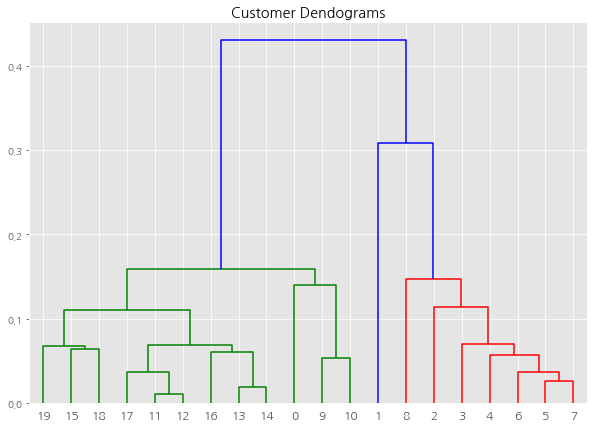

In [1113]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(dis, method='single'))

In [1114]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
cluster.fit_predict(dis)

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:471: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int64)

In [1119]:
data_gas['sing_clus']=pd.DataFrame(cluster.fit_predict(dis))

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\sklearn\cluster\hierarchical.py:471: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1120]:
data_gas

,자치구,동,sum1,sum_clus,총_점수_interval_10,수소충전소,업체명,동주소,경도,위도,clus,ward_clus,sing_clus,com_clus
0,동대문구,장안1동,0.354721,7,8,0,장안동가스충전소,서울특별시 동대문구 천호대로 353,37.562897,127.056468,2,2,1,1
1,은평구,진관동,2.014596,8,8,0,은평서부충전소,서울특별시 은평구 통일로 1186,37.643634,126.919024,0,0,2,2
2,양천구,신정3동,4.723433,9,9,0,수도에너지(주),서울특별시 양천구 신정로 146,37.506887,126.836814,4,4,0,0
3,양천구,신정4동,3.185930,9,9,0,목동충전소,서울특별시 양천구 목동로 193,37.525600,126.861875,4,4,0,0
4,구로구,구로2동,3.805830,9,8,0,한일가스산업(주),서울특별시 구로구 경인로 537,37.501882,126.875666,4,4,0,0
5,영등포구,양평1동,0.949375,8,8,0,양평동충전소,서울특별시 영등포구 선유로 157,37.527936,126.888910,4,4,0,0
6,영등포구,양평2동,1.442763,8,8,0,기린에너지,서울특별시 영등포구 선유로52길 5,37.536256,126.896764,4,4,0,0
7,영등포구,문래동,4.918385,9,9,0,(주)세지,서울특별시 영등포구 선유로 37,37.517433,126.886258,4,4,0,0
8,동작구,대방동,3.624785,9,9,0,동일석유(주)동주충전소,서울특별시 동작구 상도로 74,37.499417,126.926646,4,4,0,0
9,강남구,논현2동,10.790736,10,10,0,(주)상현상사,서울특별시 강남구 학동로 204,37.513631,127.029157,2,2,1,1


In [1121]:
data_gas.groupby(['sing_clus','자치구','동']).agg({'sum1':'mean'})

sum1
sing_clus 자치구  동              
0         구로구  구로2동   3.805830
          동작구  대방동    3.624785
          양천구  신정3동   4.723433
               신정4동   3.185930
          영등포구 문래동    4.918385
               양평1동   0.949375
               양평2동   1.442763
1         강남구  논현2동  10.790736
               도곡1동   9.671090
          동대문구 장안1동   0.354721
2         은평구  진관동    2.014596
3         강남구  세곡동   18.364857
               일원2동   6.934460
          강동구  둔촌2동   1.762095
               성내2동  -0.661485
          송파구  석촌동    3.914528
               오금동    5.464928
               잠실본동   5.370023

In [1097]:
geo_path = "geoData_copy.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [1098]:
seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="cartodbpositron")
seoul_map.choropleth(geo_data=geo_str, 
                     data = data_total ,
                     columns=['동', 'sum1'],
                     fill_color='RdPu',  # GnBu
                     key_on='properties.name',
                     highlight=True,
                     fill_opacity=0.5,
                     line_opacity=1,
                     legend_name="sum1")
seoul_map.save("size.html")

C:\Users\Cho Gyung Ah\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [1099]:
top_5_drop=top_5_drop[(top_5_drop.총_점수_interval_10>7)].reset_index(drop=True)

In [1100]:
for i in range(len(top_5_drop.loc[:,['경도','위도']])):
    folium.Marker(
        location=top_5_drop.loc[i,['경도','위도']],
        popup=top_5_drop.loc[i,['동']],
        icon=folium.Icon(color='lightgray',icon='home')
    ).add_to(seoul_map)

In [1101]:
# 양재 수소충전소를 찍어보자.
folium.Marker(
  location=[37.4686275,127.0319203],
  popup='양재 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(seoul_map)

# 상암 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5687204,126.8761933],
  popup='상암 수소 충전소 위치.',
  icon=folium.Icon(color='red',icon='star')
).add_to(seoul_map)

# 국회 수소 충전소를 찍어보자.
folium.Marker(
  location=[37.5311111,126.9132037],
  popup='2019년 완공 예정 국회 수소 충전소 위치.',
  icon=folium.Icon(color='blue',icon='star')
).add_to(seoul_map)

# 강동구 상일충전소를 찍어보자.
folium.Marker(
  location=[37.5392486,127.128611],
  popup='2019년 완공 예정 강동구 상일충전소 위치',
  icon=folium.Icon(color='blue',icon='star')
).add_to(seoul_map)

# 강서공영차고지 수소생산기지 찍어보자.
folium.Marker(
  location=[37.5775641,126.7963879],
  popup=' 2020년 완공 예정 강서공영차고지 수소생산기지 버스용',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

# 탄천물재생센터 수소춘전소 찍어보자.
folium.Marker(
  location=[37.4915688,127.0671297],
  popup=' 2020년 완공 예정이지만 미정 탄천물재생센터 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

# 현대자동차 계동사옥 수소춘전소 찍어보자.
folium.Marker(
  location=[37.566758,126.9584211],
  popup=' 아직 미정 현대자동차 계동사옥 수소춘전소',
  icon=folium.Icon(color='green',icon='star')
).add_to(seoul_map)

In [ ]:
seoul_map

# 총정리

In [12]:
# 1. 수소자동차 대수를 입력받는다. 
hydrogen_car = input("Enter the num of hydrogen car : ")

# 2. 수소자동차 대수를 기반으로 hybrid 충전소의 개수 K를 구한다. 
total_charge_needed = 200 * int(hydrogen_car) # 총 필요 충전량
total_charge_needed -= 237600
if total_charge_needed <0:
    total_charge_needed = 0
num_of_hybrid = math.floor(total_charge_needed / 142560) # hybrid 충전소 개수
num_of_converged = num_of_hybrid # 융복합충전소 개수
num_of_mobile = 3 * num_of_converged # 이동식 충전소 개수
num_of_off_site = math.floor(total_charge_needed / 57520) # 필요한 off_site 개수

print("hybrid충전소 개수 : ", num_of_hybrid)
print("이동식 충전소 개수", num_of_mobile)

Enter the num of hydrogen car : 3000
hybrid충전소 개수 :  2
이동식 충전소 개수 6


In [ ]:
# 